<a href="https://colab.research.google.com/github/aashasandeep/Pharmaceutical-Sales-prediction-across-multiple-stores-Project-6/blob/main/Task_2_Pharmaceutical_Sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents
 1. Exploring the data and Data Pre-processing
 2. Building models with sklearn pipelines
 3. Choose a loss function
 4. Post Prediction analysis
 5. Serialize models

#1. Data Preprocessing
## ****1.1 Importing Libraries

In [1]:
!pip install category_encoders
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **# 1. Train_data**

In [5]:
train_data = pd.read_csv('/content/cleaned_train_data (1).csv')

In [6]:
train_data.head()#head of the train dataset

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Date,StateHoliday,Year,Month
0,1,5,5263,555,1,1,1,2015-07,o,2015,7
1,2,5,6064,625,1,1,1,2015-07,o,2015,7
2,3,5,8314,821,1,1,1,2015-07,o,2015,7
3,4,5,13995,1498,1,1,1,2015-07,o,2015,7
4,5,5,4822,559,1,1,1,2015-07,o,2015,7


In [7]:
train_data.info()# information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017155 entries, 0 to 1017154
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017155 non-null  int64 
 1   DayOfWeek      1017155 non-null  int64 
 2   Sales          1017155 non-null  int64 
 3   Customers      1017155 non-null  int64 
 4   Open           1017155 non-null  int64 
 5   Promo          1017155 non-null  int64 
 6   SchoolHoliday  1017155 non-null  int64 
 7   Date           1017155 non-null  object
 8   StateHoliday   1017155 non-null  object
 9   Year           1017155 non-null  int64 
 10  Month          1017155 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 85.4+ MB


In [8]:
train_data.shape#shape of the dataset

(1017155, 11)

In [9]:
#Checking the no. of NaN values
train_data.isna().sum()

,0
Store,0
DayOfWeek,0
Sales,0
Customers,0
Open,0
Promo,0
SchoolHoliday,0
Date,0
StateHoliday,0
Year,0


## **2.Test_data**

In [11]:
test_data = pd.read_csv('/content/cleaned_test_data (1).csv')

In [12]:
test_data.head()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,Date,StateHoliday,Year,Month
0,1,1,4,1.0,1,0,2015-09,o,2015,9
1,2,3,4,1.0,1,0,2015-09,o,2015,9
2,3,7,4,1.0,1,0,2015-09,o,2015,9
3,4,8,4,1.0,1,0,2015-09,o,2015,9
4,5,9,4,1.0,1,0,2015-09,o,2015,9


In [13]:
test_data.shape

(41088, 10)

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Open           41088 non-null  float64
 4   Promo          41088 non-null  int64  
 5   SchoolHoliday  41088 non-null  int64  
 6   Date           41088 non-null  object 
 7   StateHoliday   41088 non-null  object 
 8   Year           41088 non-null  int64  
 9   Month          41088 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 3.1+ MB


#3.Store_data

In [89]:
store_data = pd.read_csv('/content/cleaned_store_data (1).csv')

In [18]:
store_data.head()#to find the head of the store dataset

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType,Assortment,PromoInterval
0,1,1270.0,9.0,2008.0,0,22.0,2012.0,c,a,"Jan,Apr,Jul,Oct"
1,2,570.0,11.0,2007.0,1,13.0,2010.0,a,a,"Jan,Apr,Jul,Oct"
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,a,a,"Jan,Apr,Jul,Oct"
3,4,620.0,9.0,2009.0,0,22.0,2012.0,c,c,Unknown
4,5,29910.0,4.0,2015.0,0,22.0,2012.0,a,a,Unknown


In [19]:
store_data.shape# to find the shape of the store dataset

(1115, 10)

In [20]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   CompetitionDistance        1115 non-null   float64
 2   CompetitionOpenSinceMonth  1115 non-null   float64
 3   CompetitionOpenSinceYear   1115 non-null   float64
 4   Promo2                     1115 non-null   int64  
 5   Promo2SinceWeek            1115 non-null   float64
 6   Promo2SinceYear            1115 non-null   float64
 7   StoreType                  1115 non-null   object 
 8   Assortment                 1115 non-null   object 
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Merging 'train.csv' and 'store.csv'

In [21]:
train_store_data = pd.merge(train_data, store_data, how = 'inner', on = 'Store')

In [22]:
train_store_data.head(5)#to find th head of the dataset

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Date,StateHoliday,Year,Month,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType,Assortment,PromoInterval
0,1,5,5263,555,1,1,1,2015-07,o,2015,7,1270.0,9.0,2008.0,0,22.0,2012.0,c,a,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,1,1,2015-07,o,2015,7,570.0,11.0,2007.0,1,13.0,2010.0,a,a,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,1,2015-07,o,2015,7,14130.0,12.0,2006.0,1,14.0,2011.0,a,a,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,1,2015-07,o,2015,7,620.0,9.0,2009.0,0,22.0,2012.0,c,c,Unknown
4,5,5,4822,559,1,1,1,2015-07,o,2015,7,29910.0,4.0,2015.0,0,22.0,2012.0,a,a,Unknown


In [23]:
train_store_data.columns#to find the columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Date', 'StateHoliday', 'Year', 'Month',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StoreType', 'Assortment', 'PromoInterval'],
      dtype='object')

In [24]:
train_store_data.isna().sum()#to find the NaN values

,0
Store,0
DayOfWeek,0
Sales,0
Customers,0
Open,0
Promo,0
SchoolHoliday,0
Date,0
StateHoliday,0
Year,0


# 2.1 Preprocessing
Convert Non-Numeric Columns to Numeric

In [25]:
train_store_data.sample(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Date,StateHoliday,Year,Month,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType,Assortment,PromoInterval
430554,971,3,7181,916,1,0,0,2014-06,o,2014,6,1140.0,5.0,2011.0,1,14.0,2012.0,c,a,"Mar,Jun,Sept,Dec"
808452,903,7,0,0,0,0,0,2013-07,o,2013,7,7290.0,9.0,2014.0,0,22.0,2012.0,d,c,Unknown
52893,489,7,0,0,0,0,0,2015-06,o,2015,6,14960.0,11.0,2013.0,1,37.0,2009.0,a,a,"Jan,Apr,Jul,Oct"
379412,1101,5,11231,1015,1,1,1,2014-08,o,2014,8,4060.0,9.0,2012.0,0,22.0,2012.0,d,c,Unknown
376845,276,7,0,0,0,0,0,2014-08,o,2014,8,2960.0,10.0,2014.0,1,36.0,2013.0,a,a,"Mar,Jun,Sept,Dec"


In [26]:
# Convert 'Date' to datetime
train_store_data['Date'] = pd.to_datetime(train_store_data['Date'])

# Generate New Features
For train_store_data

In [27]:
train_store_data['Weekday'] = train_store_data['Date'].dt.weekday
train_store_data['IsWeekend'] = train_store_data['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
train_store_data['DayOfMonth'] = train_store_data['Date'].dt.day
train_store_data['Month'] = train_store_data['Date'].dt.month
train_store_data['Year'] = train_store_data['Date'].dt.year
train_store_data['IsMonthStart'] = train_store_data['Date'].dt.is_month_start.astype(int)
train_store_data['IsMonthEnd'] = train_store_data['Date'].dt.is_month_end.astype(int)

In [28]:
train_store_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Date', 'StateHoliday', 'Year', 'Month',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StoreType', 'Assortment', 'PromoInterval',
       'Weekday', 'IsWeekend', 'DayOfMonth', 'IsMonthStart', 'IsMonthEnd'],
      dtype='object')

# for test_store_data

# Drop date column

In [29]:
train_store_data = train_store_data.drop(['Date'], axis=1)


# Scaling the Train_store Dataset

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
num_cols = ['Store','Sales','Customers','Year','CompetitionDistance','CompetitionOpenSinceYear',
           'Promo2SinceYear','DayOfMonth','CompetitionOpenSinceMonth']
train_store_data[num_cols] = scaler.fit_transform(train_store_data[num_cols])

In [32]:
train_store_data.sample(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday,Year,Month,...,Promo2SinceWeek,Promo2SinceYear,StoreType,Assortment,PromoInterval,Weekday,IsWeekend,DayOfMonth,IsMonthStart,IsMonthEnd
350776,0.359964,7,0.000000,0.000000,0,0,0,o,0.5,8,...,13.0,0.166667,c,c,"Jan,Apr,Jul,Oct",4,0,0.0,1,0
431066,0.329443,2,0.187168,0.085544,1,0,1,o,0.5,6,...,45.0,0.000000,d,c,"Feb,May,Aug,Nov",6,1,0.0,1,0
835066,0.680431,4,0.119299,0.080671,1,0,0,o,0.0,6,...,31.0,0.666667,a,a,"Feb,May,Aug,Nov",5,1,0.0,1,0
653039,0.421005,6,0.334288,0.286816,1,0,0,o,0.0,11,...,22.0,0.500000,a,c,Unknown,4,0,0.0,1,0
681805,0.219928,1,0.132055,0.109502,1,0,0,o,0.0,10,...,22.0,0.500000,c,a,Unknown,1,0,0.0,1,0


# Scaling the Train_store Dataset

In [33]:
train_store_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday', 'Year', 'Month', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType', 'Assortment',
       'PromoInterval', 'Weekday', 'IsWeekend', 'DayOfMonth', 'IsMonthStart',
       'IsMonthEnd'],
      dtype='object')

<Axes: xlabel='Sales', ylabel='Density'>

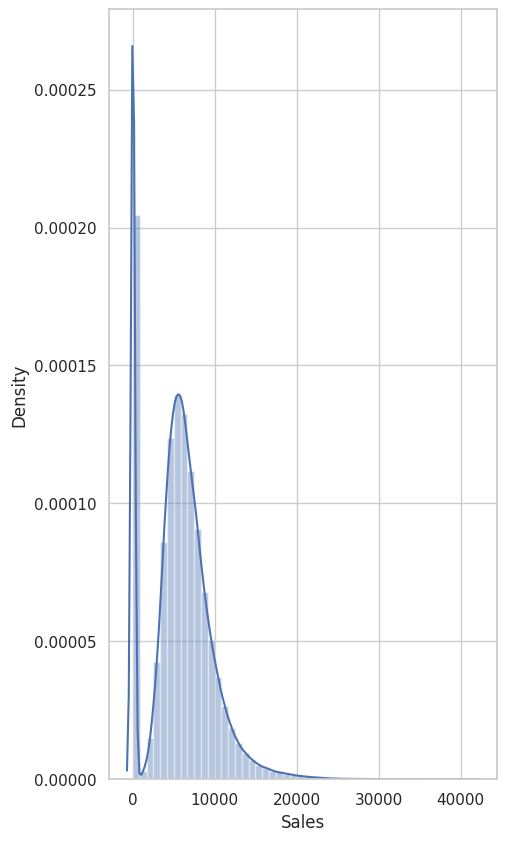

In [34]:
#Find the range of data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(train_data["Sales"])

<Axes: xlabel='Customers', ylabel='Density'>

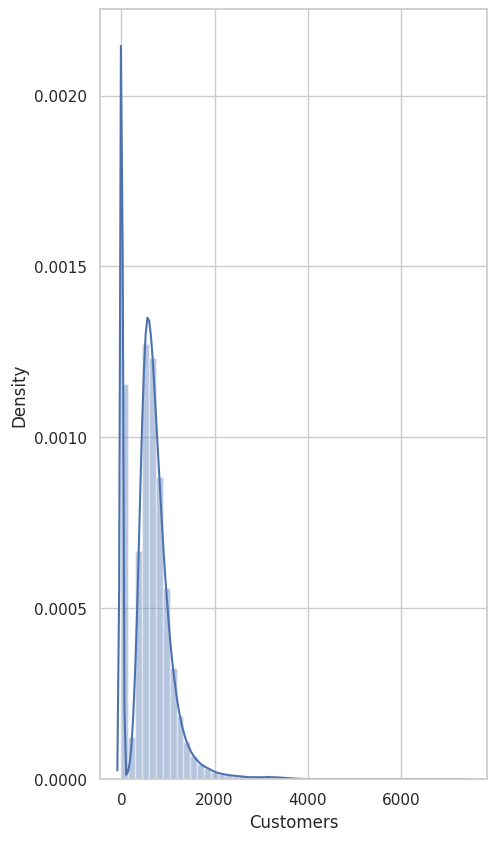

In [35]:
#Find the range of the data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(train_data["Customers"])

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

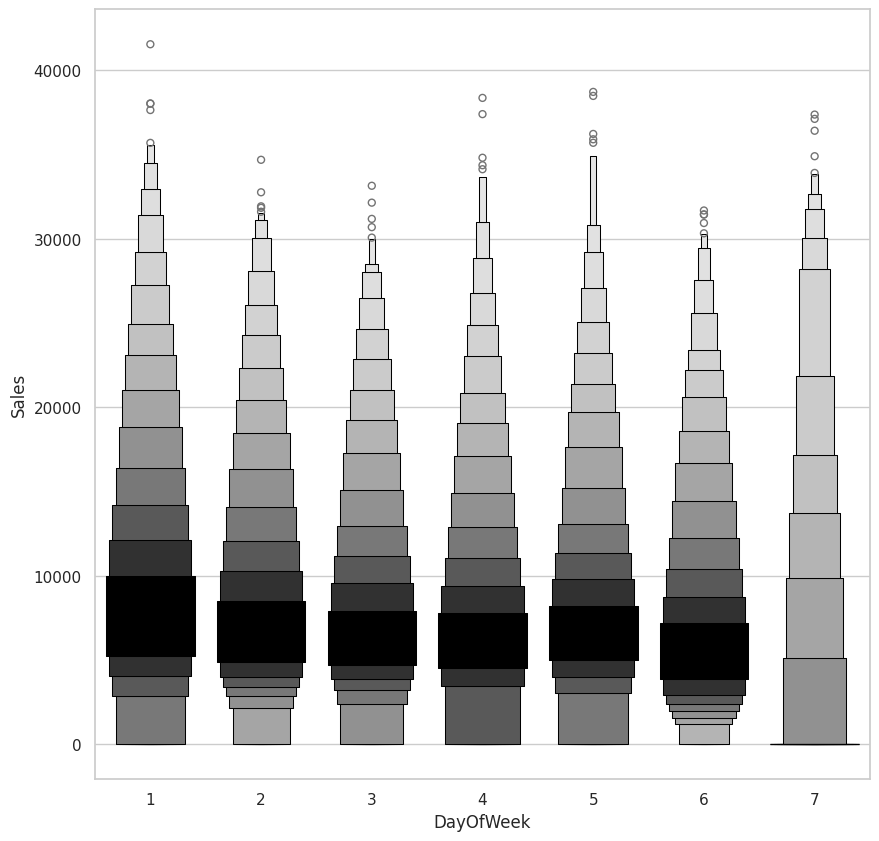

In [36]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(data=train_data,scale="linear",x="DayOfWeek",y="Sales",color="Black")

<Axes: xlabel='DayOfWeek', ylabel='Customers'>

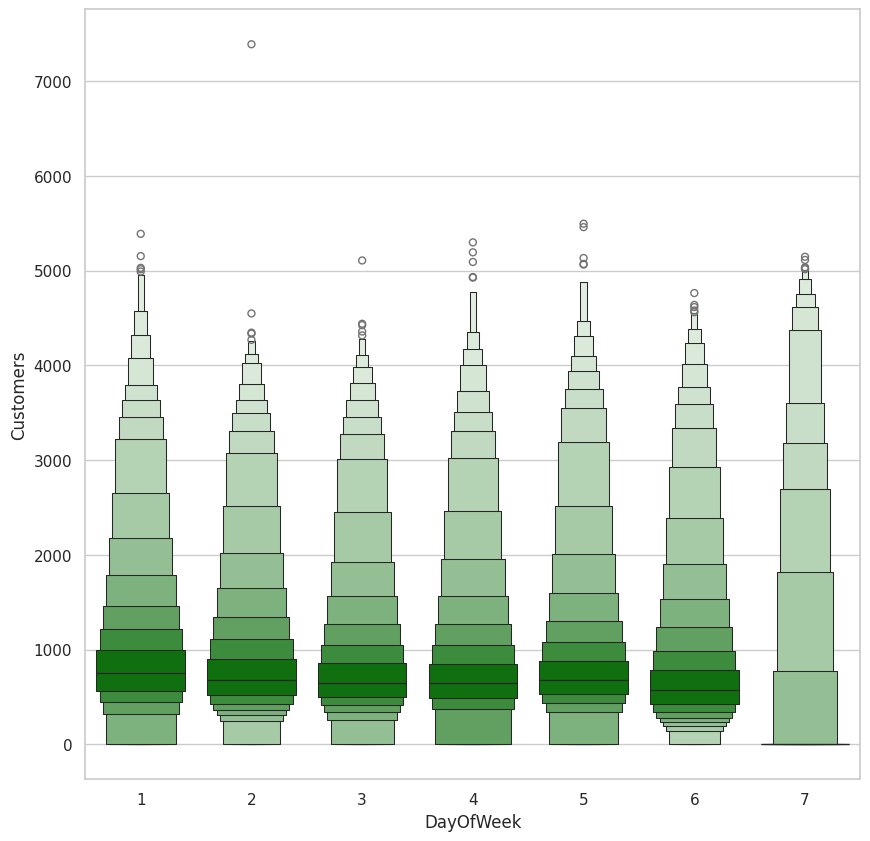

In [37]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(y="Customers", x="DayOfWeek",data=train_data, scale="linear",color="Green")

This data, contains many outliers, but these might have been caused to the surge of customers during a festival or Holiday, or due to an effective promo. Below we are handle the outliers

In [38]:
#Treating the outliers
  # a function for replacing outliers with the median, used when there's too many outliers in a feature
def replace_outlier_with_median(dataFrame, feature):
    Q1 = dataFrame[feature].quantile(0.25)
    Q3 = dataFrame[feature].quantile(0.75)
    median = dataFrame[feature].quantile(0.50)

    IQR = Q3 - Q1

    upper_whisker = Q3 + (1.5 * IQR)
    lower_whisker = Q1 - (1.5 * IQR)

    dataFrame[feature] = np.where(dataFrame[feature] > upper_whisker, median, dataFrame[feature])
    dataFrame[feature] = np.where(dataFrame[feature] < lower_whisker, median, dataFrame[feature])

In [39]:
replace_outlier_with_median(train_data, 'Sales')

In [40]:
replace_outlier_with_median(train_data, 'Customers')

<Axes: xlabel='Sales', ylabel='Density'>

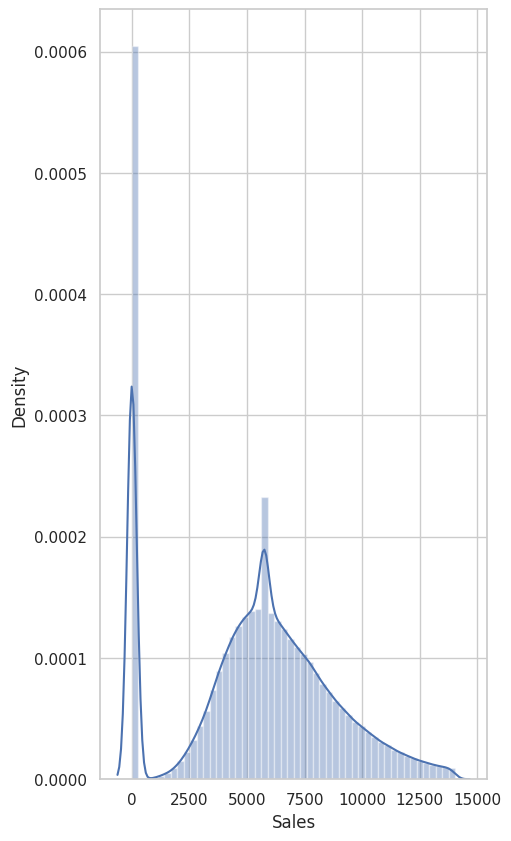

In [41]:
#Find the range of data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(train_data["Sales"])

<Axes: xlabel='Customers', ylabel='Density'>

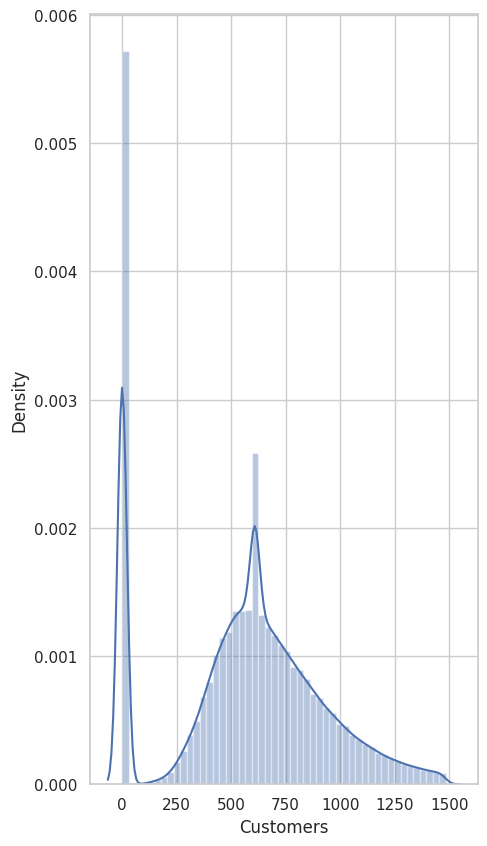

In [42]:
#Find the range of the data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(train_data["Customers"])

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

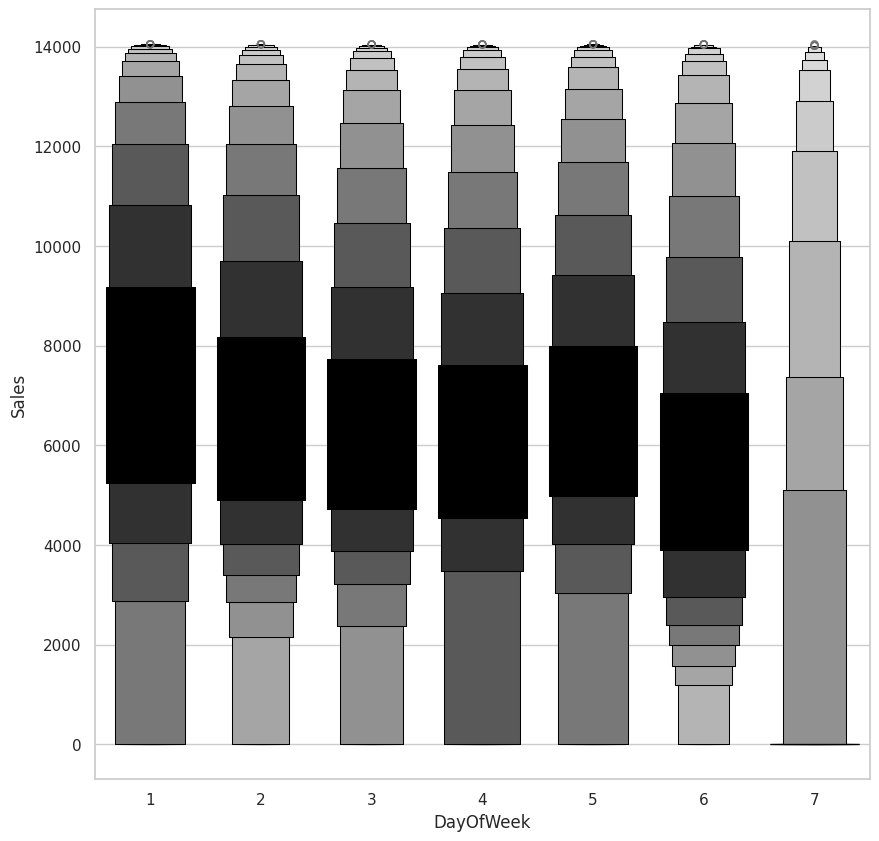

In [43]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(data=train_data,scale="linear",x="DayOfWeek",y="Sales",color="Black")

<Axes: xlabel='DayOfWeek', ylabel='Customers'>

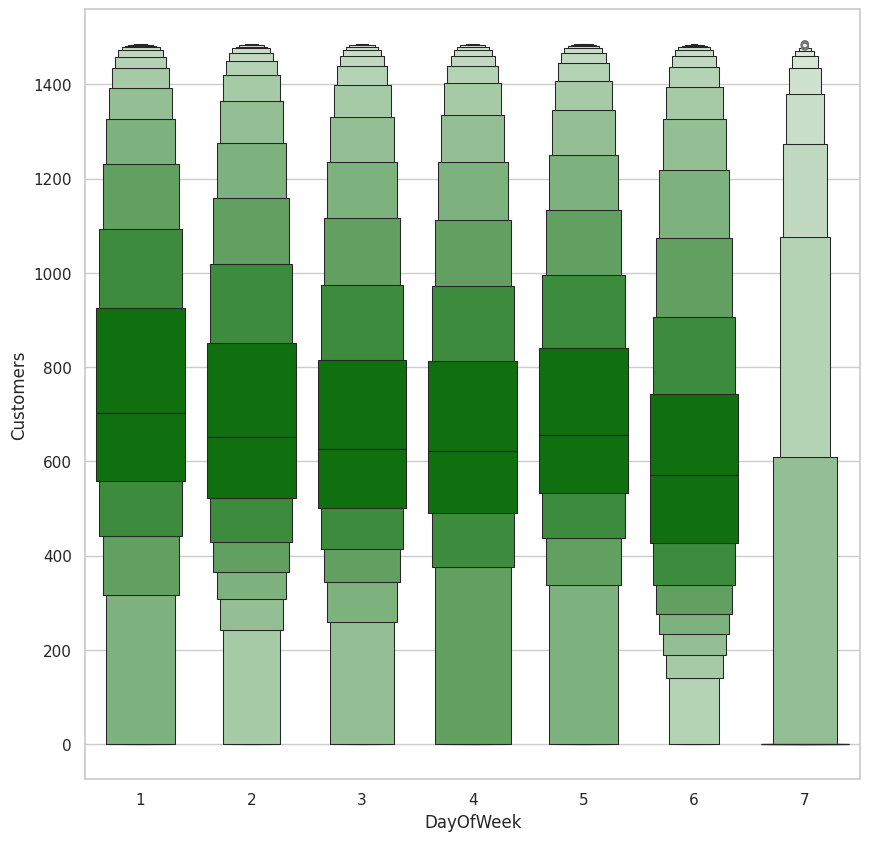

In [44]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(y="Customers", x="DayOfWeek",data=train_data, scale="linear",color="Green")

1.3 Feature Engeneering

Generating new features from already existing features.

In [45]:
train_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Date,StateHoliday,Year,Month
0,1,5,5263.0,555.0,1,1,1,2015-07,o,2015,7
1,2,5,6064.0,625.0,1,1,1,2015-07,o,2015,7
2,3,5,8314.0,821.0,1,1,1,2015-07,o,2015,7
3,4,5,13995.0,609.0,1,1,1,2015-07,o,2015,7
4,5,5,4822.0,559.0,1,1,1,2015-07,o,2015,7


In [46]:
#Adding salespercustomer column
train_data['SalesperCustomer']=train_data['Sales']/train_data['Customers']

In [47]:
train_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Date,StateHoliday,Year,Month,SalesperCustomer
0,1,5,5263.0,555.0,1,1,1,2015-07,o,2015,7,9.482883
1,2,5,6064.0,625.0,1,1,1,2015-07,o,2015,7,9.702400
2,3,5,8314.0,821.0,1,1,1,2015-07,o,2015,7,10.126675
3,4,5,13995.0,609.0,1,1,1,2015-07,o,2015,7,22.980296
4,5,5,4822.0,559.0,1,1,1,2015-07,o,2015,7,8.626118


In [48]:
train_data['Date'] = pd.to_datetime(train_data['Date'])

In [49]:
train_data['Year']=train_data.Date.dt.year

# Correlation Analysis

In [50]:
import pandas as pd

# Assuming 'train_data' is your DataFrame

# Get a list of existing columns in 'train_data'
existing_columns = train_data.columns.tolist()

# Define the desired columns for 'df_correlation'
desired_columns = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
                    'SchoolHoliday',
                    'CompetitionDistance', 'CompetitionOpenSinceMonth',
                    'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
                    'Promo2SinceYear', 'SalesperCustomer', 'Months', 'Year',
                    'StateHoliday', 'Assortment', 'StoreType',
                    'PromoInterval']

# Find the common columns between desired and existing columns
common_columns = list(set(desired_columns) & set(existing_columns))

# Create 'df_correlation' using only the common columns
df_correlation = train_data[common_columns]

In [51]:
import pandas as pd
import numpy as np

# Select only numeric columns before calculating correlation
numeric_columns = train_store_data.select_dtypes(include=np.number).columns
correlation_matrix = train_store_data[numeric_columns].corr()

In [52]:
correlation_with_target = correlation_matrix['Sales'].abs().sort_values(ascending=False)

In [53]:
correlation_with_target

,Sales
Sales,1.000000
Customers,0.894700
Open,0.678553
DayOfWeek,0.462170
Promo,0.452385
Promo2,0.091012
SchoolHoliday,0.085141
Month,0.048758
Promo2SinceWeek,0.032480
CompetitionOpenSinceMonth,0.023628


In [54]:
import pandas as pd

# Assuming 'train_data' is your DataFrame and it might not have a 'Date' column

# Check if 'Date' column exists before processing
if 'Date' in train_data.columns:
    # Extract day of month, month start, and month end information from the 'Date' column
    train_data['DayOfMonth'] = pd.to_datetime(train_data['Date']).dt.day
    train_data['IsMonthStart'] = pd.to_datetime(train_data['Date']).dt.is_month_start.astype(int)
    train_data['IsMonthEnd'] = pd.to_datetime(train_data['Date']).dt.is_month_end.astype(int)

    # Now perform forward and backward fill
    forward_fill = train_data[['DayOfMonth', 'IsMonthStart', 'IsMonthEnd']].fillna(method='ffill')
    backward_fill = train_data[['DayOfMonth', 'IsMonthStart', 'IsMonthEnd']].fillna(method='bfill')

    print("\nForward Fill:")
    print(forward_fill)

    print("\nBackward Fill:")
    print(backward_fill)

    print("\nForward Fill:")
    print(forward_fill)

    print("\nBackward Fill:")
    print(backward_fill)
else:
    print("Error: 'Date' column not found in the DataFrame.")


Forward Fill:
         DayOfMonth  IsMonthStart  IsMonthEnd
0                 1             1           0
1                 1             1           0
2                 1             1           0
3                 1             1           0
4                 1             1           0
...             ...           ...         ...
1017150           1             1           0
1017151           1             1           0
1017152           1             1           0
1017153           1             1           0
1017154           1             1           0

[1017155 rows x 3 columns]

Backward Fill:
         DayOfMonth  IsMonthStart  IsMonthEnd
0                 1             1           0
1                 1             1           0
2                 1             1           0
3                 1             1           0
4                 1             1           0
...             ...           ...         ...
1017150           1             1           0
1017151           1  

In [55]:
correlation_with_target

,Sales
Sales,1.000000
Customers,0.894700
Open,0.678553
DayOfWeek,0.462170
Promo,0.452385
Promo2,0.091012
SchoolHoliday,0.085141
Month,0.048758
Promo2SinceWeek,0.032480
CompetitionOpenSinceMonth,0.023628


#Select features with correlation above a threshold 0.5

In [56]:
highly_correlated_features = correlation_with_target[correlation_with_target > 0.5].index.tolist()

In [57]:
highly_correlated_features

['Sales', 'Customers', 'Open']

#Findings:
Generated additional features from datetime columns that capture temporal patterns.

Ensured that the dataset was fully numeric and ready for model training.

# 2.2 Building models with sklearn pipelines
Splitting the data into train and test sets

In [58]:
X = train_store_data[['Customers', 'Open', 'Weekday', 'DayOfWeek', 'IsWeekend']]
y = train_store_data[['Sales']]

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.utils import resample

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with RandomForestRegressor

In [61]:
model_RFG = Pipeline([
    ('regressor', RandomForestRegressor(n_estimators=10))
])

In [62]:
# Train the model
model_RFG.fit(X_train, y_train)

Pipeline(steps=[('regressor', RandomForestRegressor(n_estimators=10))])

In [63]:
# Make predictions
y_pred = model_RFG.predict(X_test)

#Evaluate r2_score

In [64]:
from sklearn.metrics import r2_score
r2_RFG = r2_score(y_test, y_pred)
print(r2_RFG)

0.8300531249856806


# Create a pipeline with GradientBoostingRegressor

In [65]:
model_GBR = Pipeline([
    ('regressor', GradientBoostingRegressor(n_estimators=100))
])

In [66]:
# Train the model
model_GBR.fit(X_train, y_train)

Pipeline(steps=[('regressor', GradientBoostingRegressor())])

In [67]:
# Make predictions
y_pred1 = model_GBR.predict(X_test)

In [68]:
r2_GBR = r2_score(y_test, y_pred1)
print(r2_GBR)

0.8532367114794096


# Findings:
The model pipeline ensured a smooth workflow, from preprocessing to model training.

Gradient Boosting Regressor showed strong performance on the training data, capturing complex interactions between features.

# 2.3 Choose a loss function
For RandomForest Regressor

In [69]:
mse_RFG = mean_squared_error(y_test, y_pred)
print(mse_RFG)

0.001449564527777987


In [70]:
mae_RFG = mean_absolute_error(y_test, y_pred)
print(mae_RFG)

0.025016699448732443


In [71]:
rmse_RFG = mse_RFG ** 0.5
print(rmse_RFG)

0.03807314706952903


In [72]:
def huber_loss(y_test, y_pred, delta=1.0):
    y_test = np.ravel(y_test)
    y_pred = np.ravel(y_pred)
    error = y_test - y_pred

    is_small_error = np.abs(error) <= delta
    squared_loss = np.square(error) / 2
    linear_loss = delta * (np.abs(error) - delta / 2)
    return np.where(is_small_error, squared_loss, linear_loss).mean()

In [73]:
huber_scorer = make_scorer(huber_loss, greater_is_better=False)

In [74]:
huber_loss_value = huber_loss(y_test, y_pred)
print(f'Huber Loss: {huber_loss_value}')

Huber Loss: 0.0007247822638889935


# For GradientBoosting Regressor

In [75]:
mse_GBR = mean_squared_error(y_test, y_pred)
print(mse_GBR)

0.001449564527777987


In [76]:
rmse_GBR = mse_GBR ** 0.5
print(rmse_GBR)

0.03807314706952903


In [77]:
mae_GBR = mean_absolute_error(y_test, y_pred)
print(mae_GBR)

0.025016699448732443


In [78]:
huber_loss_value = huber_loss(y_test, y_pred1)
print(f'Huber Loss: {huber_loss_value}')

Huber Loss: 0.0006259098821368999


# Findings:
1 . MAE was effective in assessing the model's performance, offering insights into the average error between predicted and actual sales

# 2.4 Post Prediction analysis

In [79]:
def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    df_train={'feature_names':feature_names,'feature_importance':feature_importance}
    df_train = pd.DataFrame(df_train)

    df_train.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data=df_train)
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [80]:
regressor = model_RFG.named_steps['regressor']

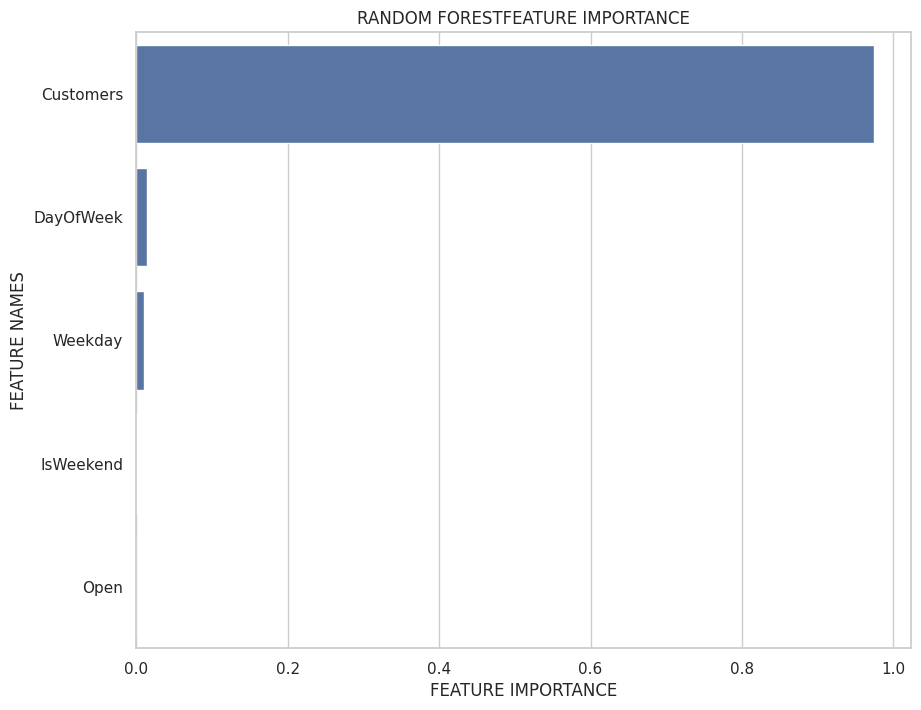

In [81]:
plot_feature_importance(regressor.feature_importances_,X_train.columns,'RANDOM FOREST')

# Estimating Confidence Intervals

In [82]:
def bootstrap_prediction_intervals(model,X, n_bootstrap=100, alpha=0.05):

    boot_preds = []
    n_samples = X.shape[0]

    for _ in range(n_bootstrap):
        # Sample with replacement
        indices = np.random.choice(n_samples, n_samples, replace=True)
        X_sample = X.iloc[indices]

        # Predict using the bootstrap sample
        y_pred_sample = model.predict(X_sample)
        boot_preds.append(y_pred_sample)

    boot_preds = np.array(boot_preds)

    lower_bound = np.percentile(boot_preds, 100 * alpha / 2, axis=0)
    upper_bound = np.percentile(boot_preds, 100 * (1 - alpha / 2), axis=0)

    return lower_bound, upper_bound

In [83]:
# Calculate confidence intervals for the test set predictions
lower_bound, upper_bound = bootstrap_prediction_intervals(model_RFG, X_test)

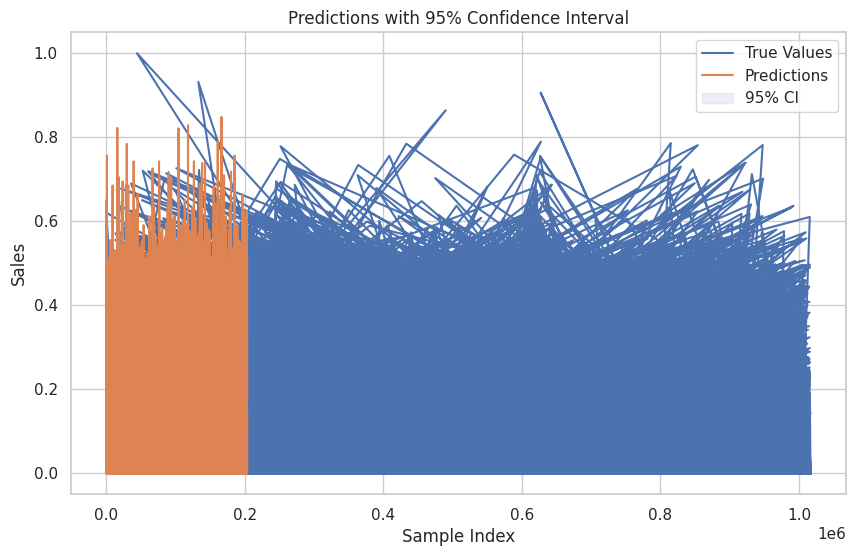

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions')
plt.fill_between(range(len(y_pred)), lower_bound, upper_bound, color='b', alpha=0.1, label='95% CI')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.title('Predictions with 95% Confidence Interval')
plt.show()

# Findings:
Identified key features that drive sales predictions, which can inform future business decisions.

Provided confidence intervals, offering a range within which the true sales value is likely to fall, enhancing the trust in the model’s predictions.

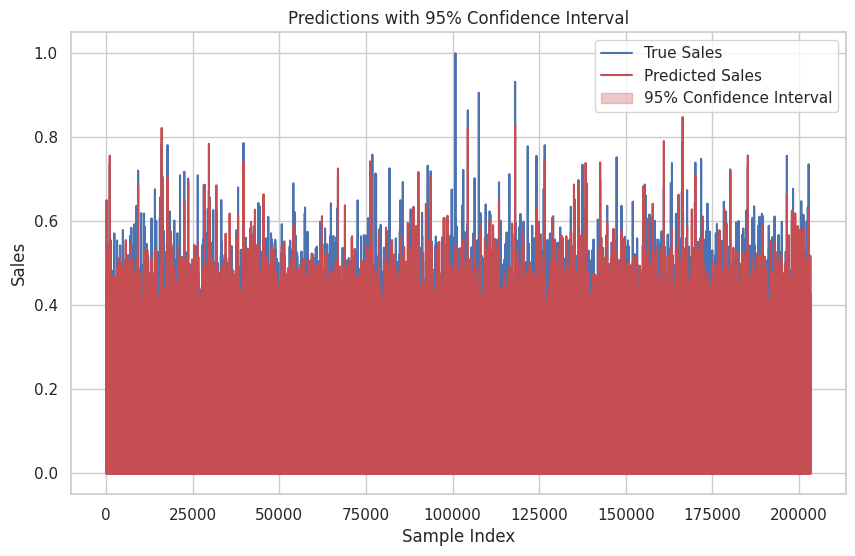

In [85]:
# Plot predictions with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Sales')
plt.plot(y_pred, label='Predicted Sales', color='r')
plt.fill_between(np.arange(len(y_test)),lower_bound, upper_bound, color='r', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.title('Predictions with 95% Confidence Interval')
plt.show()

#2.5 Serialize models

In [92]:
import pickle
import os
from datetime import datetime

# Generate a timestamp in the format dd-MM-yyyy-HH-mm-ss-SS
timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S-%f")

# Define the directory where you want to save the model
directory = r'/content/drive/MyDrive/Pharmaceutical Sales'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Create a filename with the timestamp
filename = os.path.join(directory, f'model-{timestamp}.pkl')

# Serialize the model using pickle
with open(filename, 'wb') as file:
    pickle.dump(model_GBR, file)

In [86]:
import pickle
import os
from datetime import datetime

In [87]:
# Generate a timestamp in the format dd-MM-yyyy-HH-mm-ss-SS
timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S-%f")

# Define the directory where you want to save the model
directory =r'/content/drive/MyDrive/Pharmaceutical Sales'

# Create a filename with the timestamp
filename = os.path.join(directory, f'model-{timestamp}.pkl')

In [93]:
# Serialize the model using pickle
with open(filename, 'wb') as file:
    pickle.dump(model_GBR, file)

In [90]:
# save the model to disk using pickle
filename = 'model.pkl'
pickle.dump(regressor, open('Pharmaceutical Sales', 'wb'))

In [91]:
print(f"Model saved as {'Pharmaceutical Sales'}")

Model saved as Pharmaceutical Sales


# Findings:
Successfully serialized the model, facilitating its deployment in production environments.

Timestamped filenames ensure that models are properly versioned and can be easily referenced in the future